# Naive Bayes Classifiers 

Let a discrete-valued features $x \in \{1,...,K\}^D$ where $K$ is the number of values for each feature and D is the number of features. We will use a generative approach. 

\begin{equation}
p(\boldsymbol{x}|y=c,\theta) = \prod_{j=1}^Dp(x_j|y=c,\theta_{jc})
\end{equation}


the resulting model is called a *Naive Bayes Classifier* (NBC)

In the case of real-valued features, we can use the Gaussian distribution $p($**x**$|y=x, \theta) = \prod_{j=1}^D N(x_{jc}|\mu_{jc}, \sigma_{jc}^2)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
D = 2 # numbers of features or the dimension of data
K = 2 # number of values for each feature
C = 4 # number of classes 

mu_d = np.random.randint(low=1,high=100,size=(C,2),dtype='int')
sigma_d = np.random.randint(low=0,high=20,size=(C,2),dtype='int')

print('means')
print(mu_d)
print('sigmas')
print(sigma_d)

means
[[ 3 24]
 [63 94]
 [68  7]
 [75 87]]
sigmas
[[13 18]
 [ 9  5]
 [ 9  9]
 [11 12]]


In [4]:
N = 1000 #number of samples
inputs = []
labels = []
for label, stats in enumerate(zip(mu_d, sigma_d)):
    mu    =  stats[0]
    sigma =  stats[1]
    feature_1 = np.random.normal(mu[0], sigma[0], N)
    feature_2 = np.random.normal(mu[1], sigma[1], N)
    data = np.column_stack((feature_1, feature_2))
    inputs.append(data)
    labels.append([label]*N)

In [5]:
Y = np.array(labels).flatten()
X = np.array(inputs)
X = X.reshape(-1, X.shape[-1])

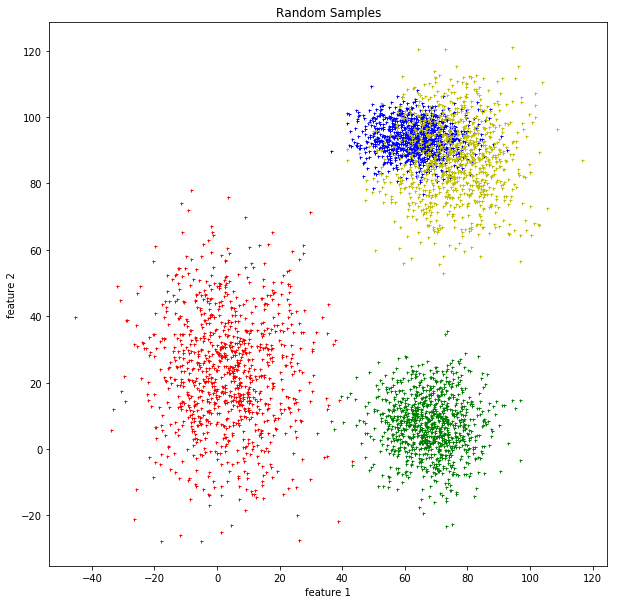

In [6]:
plt.figure(figsize=(10,10))
for x_, y_ in zip(X,Y):
    if y_ == 0:
        plt.plot(x_[0], x_[1], 'r+', markersize=3)
    if y_ == 1:
        plt.plot(x_[0], x_[1], 'b+', markersize=3)
    if y_ == 2:
        plt.plot(x_[0], x_[1], 'g+', markersize=3)
    if y_ == 3:
        plt.plot(x_[0], x_[1], 'y+', markersize=3)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Random Samples')
plt.show()

### Model Fitting

We now discuss how to train a naive Bayes classifier. This usually means computing the MLE or MAP estimate for the parameters. However, we will also discuss how to compute the full posterior, $p(\theta|D)$

In [7]:
from sklearn.utils import shuffle
X_, Y_ = shuffle(X,Y)
x_train = X_[0:700]
y_train = Y_[0:700]
x_test  = X_[700:]
y_test  = Y_[700:]

The probability for a single data case is given by 
\begin{equation}
p(x_i, y_i |\theta) \\
= p(y_i|\pi)\prod_jp(x_{ij}|\theta_j) \\
= \prod_c\pi_c^{\boldsymbol{1}{\{y_i = c\}}}\prod_j\prod_c p(x_{ij}|\theta_{jc})^{\boldsymbol{1}\{y_i = c\}}
\end{equation}

Hence the log-likelihood is given by
\begin{equation}
log(p(D|\theta)) = \sum_{c=1}^CN_c\log{\pi_c}+\sum_{j=1}^D\sum_{c=1}^C\sum_{i:y_i=c}\log{p(x_{ij}|\theta_{jc}})
\end{equation}

We can see that this expression decomposes into a series of terms, obe concerning $\pi$ and $DC$ terms containing the $\theta_{jc}$'s. Hence we can optimize all these parameters separately.

\begin{equation}
\hat{\pi}_{c} = \frac{N_c}{N}
\end{equation}

where $N_c \doteq \sum_i \boldsymbol{1}(x_{ij}=1, y_i=c)$ is the number of examples in class $c$ where feature $j$ turns on.

In [18]:
# Extracting counts from unique labels in training set
_ , c_quantities = np.unique(y_train, return_counts=True)
# Make division to calculate the pi_star that contains the optimal values
pi_star = np.divide(c_quantities, y_train.shape[0])

In [19]:
pi_star

array([0.24571429, 0.24714286, 0.23571429, 0.27142857])

Now we need to calculate the optimous parameters for $\theta_{jc}\sim N(\theta_{jc})$. In this case, $\theta$ corresponds to the mean $\mu$ and variance $\sigma^2$ of the normal distribution

The **likelihood** function is
<center>
$\begin{equation}
L(\mu, \sigma, x_1...x_{N_c}) = (2\pi\sigma^2)^{-\frac{{N_c}}{2}} e^{(-\frac{1}{2\sigma^2}\sum_{j-1}^{N_c}(x_j-\mu)^2)}
\end{equation}$
</center>
and the **log-likelihood**
<center>
$\begin{equation}
l(\mu, \sigma, x_1...x_{N_c}) = -\frac{N_c}{2}\log{2\pi}-\frac{{N_c}}{2}\log{\sigma^2}-\frac{1}{2\sigma^2}\sum_{j-1}^{N_c}(x_j-\mu)^2
\end{equation}$
</center>
The Maximum Log Likelihood estimators of the mean and the variance are:
<center>
$\begin{equation}
\mu_{N_c} = \frac{1}{{N_c}}\sum_{j=1}^{N_c} x_j
\end{equation}$
</center>
<center>
$\begin{equation}
\sigma_{N_c}^2 = \frac{1}{N_c}\sum_{j=1}^{N_c}(x_j-\mu)^2
\end{equation}$
</center>

In [20]:
x_train

array([[  6.7662943 ,   8.70977896],
       [  2.64212327,  19.36171057],
       [ 62.21611929,  70.27821837],
       ...,
       [ -9.12457563,  72.02344181],
       [ 60.05008645,  90.28391024],
       [-11.1068072 ,  52.044897  ]])

In [27]:
x_0 = x_train[y_train == 0]
x_1 = x_train[y_train == 1]
x_2 = x_train[y_train == 2]
x_3 = x_train[y_train == 3]

In [75]:
mu_star = [np.divide(np.sum(x_0, axis=0), x_0.shape[0]),
           np.divide(np.sum(x_1, axis=0), x_1.shape[0]),
           np.divide(np.sum(x_2, axis=0), x_2.shape[0]),
           np.divide(np.sum(x_3, axis=0), x_3.shape[0])]

In [76]:
sigma_star = [np.divide(np.subtract(x_0, mu_star[0]), x_0.shape[0]),
              np.divide(np.subtract(x_1, mu_star[1]), x_1.shape[0]),
              np.divide(np.subtract(x_2, mu_star[2]), x_2.shape[0]),
              np.divide(np.subtract(x_3, mu_star[3]), x_3.shape[0])]